### **Importation of Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
import re

**Dataset path:** https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification

### **Loading the dataset**

In [2]:
## Specifying the path for target columns
input_dir = Path("../bbc/")

## Saving the target class categories in the categories column
categories = [category.name for category in input_dir.iterdir() if category.is_dir()]
categories

['business', 'entertainment', 'politics', 'sport', 'tech']

#### **Loading the text files and storing them as features for the model in variable X**
#### **Storing the directory name as label for the each of the feature**

In [3]:
X=[]
y=[]
for cat in categories:
    for feature_path in (input_dir/cat).iterdir():
        if feature_path.is_file():
            #Storing the category label
            y.append(cat)
            #storing the text features
            X.append(open(feature_path,encoding="utf8", errors='ignore').read())

### **Creating the dataframe of the dataset**

In [4]:
data=pd.DataFrame({
    "text":X,
    "label":y
})

## **Data Exploration**

#### **How data Looks like**

In [5]:
data.head()

text     label
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business

#### The number of rows and columns present inside the dataset

In [6]:
data.shape

(2225, 2)

#### Checking the non-null count, column name and size of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   label   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### Distribution of the target column

In [8]:
data['label'].value_counts()

label
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

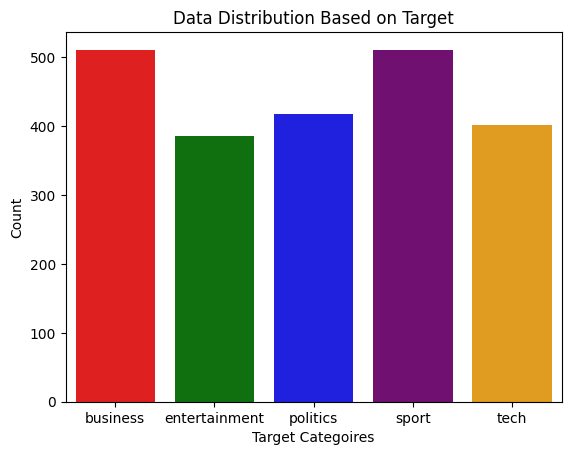

In [9]:
sns.countplot(x='label',data=data,palette=['red','green','blue','purple','orange'],hue='label')
plt.title("Data Distribution Based on Target")
plt.xlabel("Target Categoires")
plt.ylabel("Count")
plt.show()

## **Data Preprocessing**

#### Checking missing values from the dataset

In [10]:
data.isna().sum()

text     0
label    0
dtype: int64

#### Checking the number of duplicate records present inside the dataset 

In [11]:
data.duplicated().sum()

98

#### Removing the duplicate entries from the dataset

In [12]:
data.drop_duplicates(keep=False,inplace=True)

##### Rechecking whether duplicates got removed or not

In [13]:
data.duplicated().sum()

0

### **Data Cleaning**

##### Generating the word cloud before preprocessing

In [14]:
from wordcloud import WordCloud

#### Calculating Frequency of Words

In [15]:
def frequency_words(text):
  words_count=[]
  for word in text.split():
    words_count.extend(word)
  #Generating word frequences using value_counts in word-list
  word_freq=pd.Series(words_count).value_counts()
  word_freq[:100]#displaying top 100 words
  return word_freq

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Calculating the frequency of each word in the text

In [17]:
freq=frequency_words(data.text.str)
freq

the             40752
to              22540
of              17947
and             16240
a               15731
                ...  
infiltrating        1
ring.               1
Brave,              1
snuff               1
LOL                 1
Name: count, Length: 63872, dtype: int64

#### WordCloud representing frequency of each word in all the docs

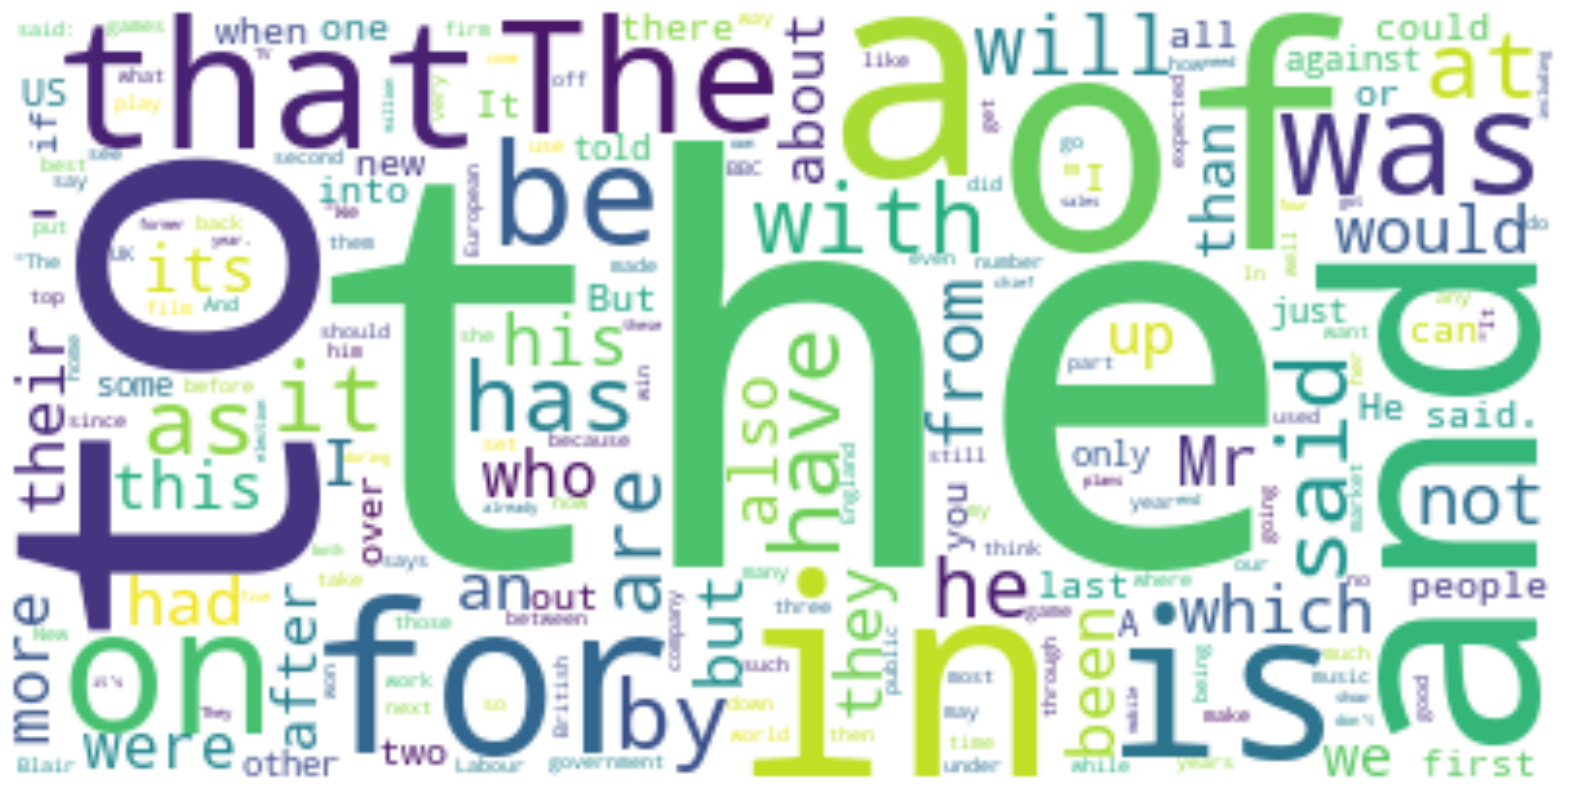

In [71]:
plt.figure(figsize=(20,20))
wordc=WordCloud(max_words=200,width=400,height=200,background_color='white').generate_from_frequencies(freq)
plt.axis('off')
plt.imshow(wordc,interpolation='bilinear')
plt.show()

In [18]:
categories

['business', 'entertainment', 'politics', 'sport', 'tech']

#### Word cloud for Busniess text docs

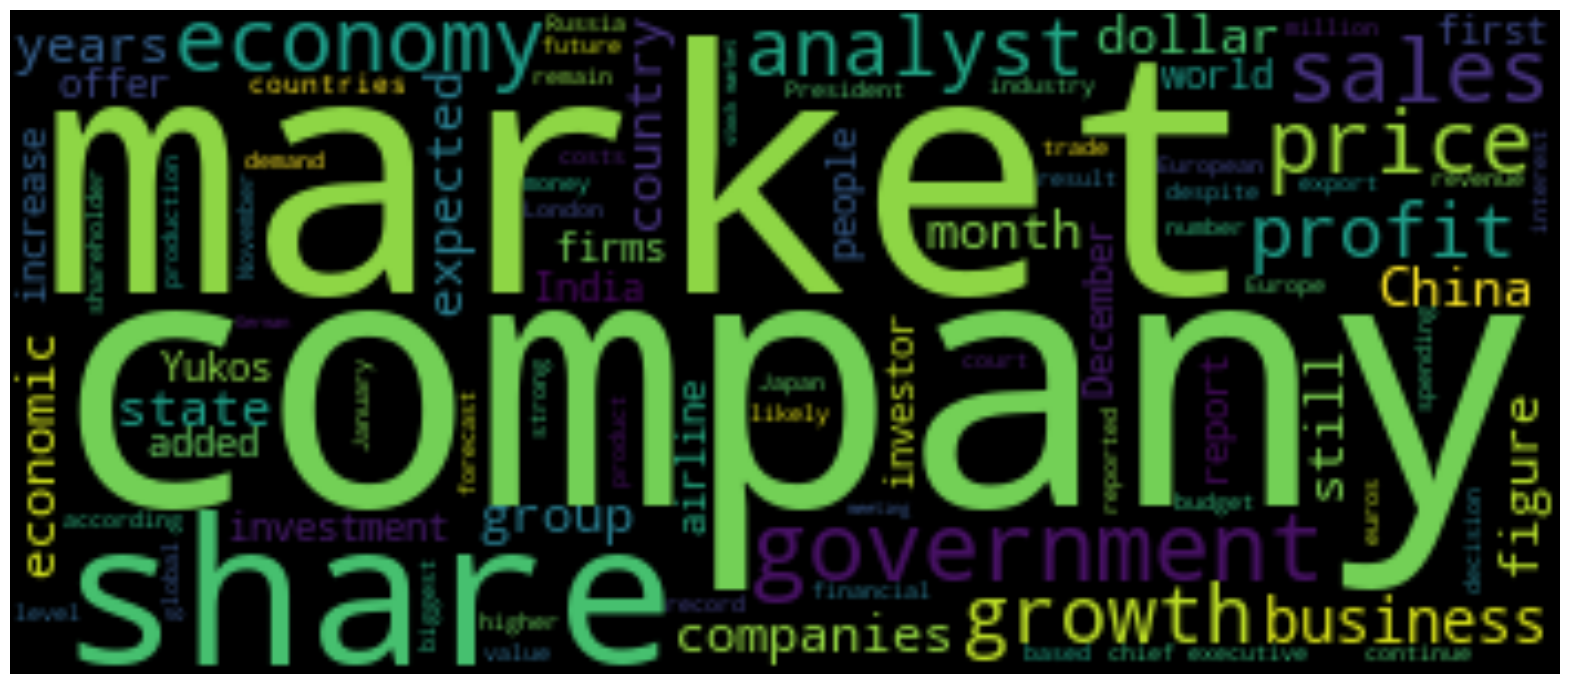

In [73]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5).generate(" ".join(data[data.label=='business'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for entertainment text docs

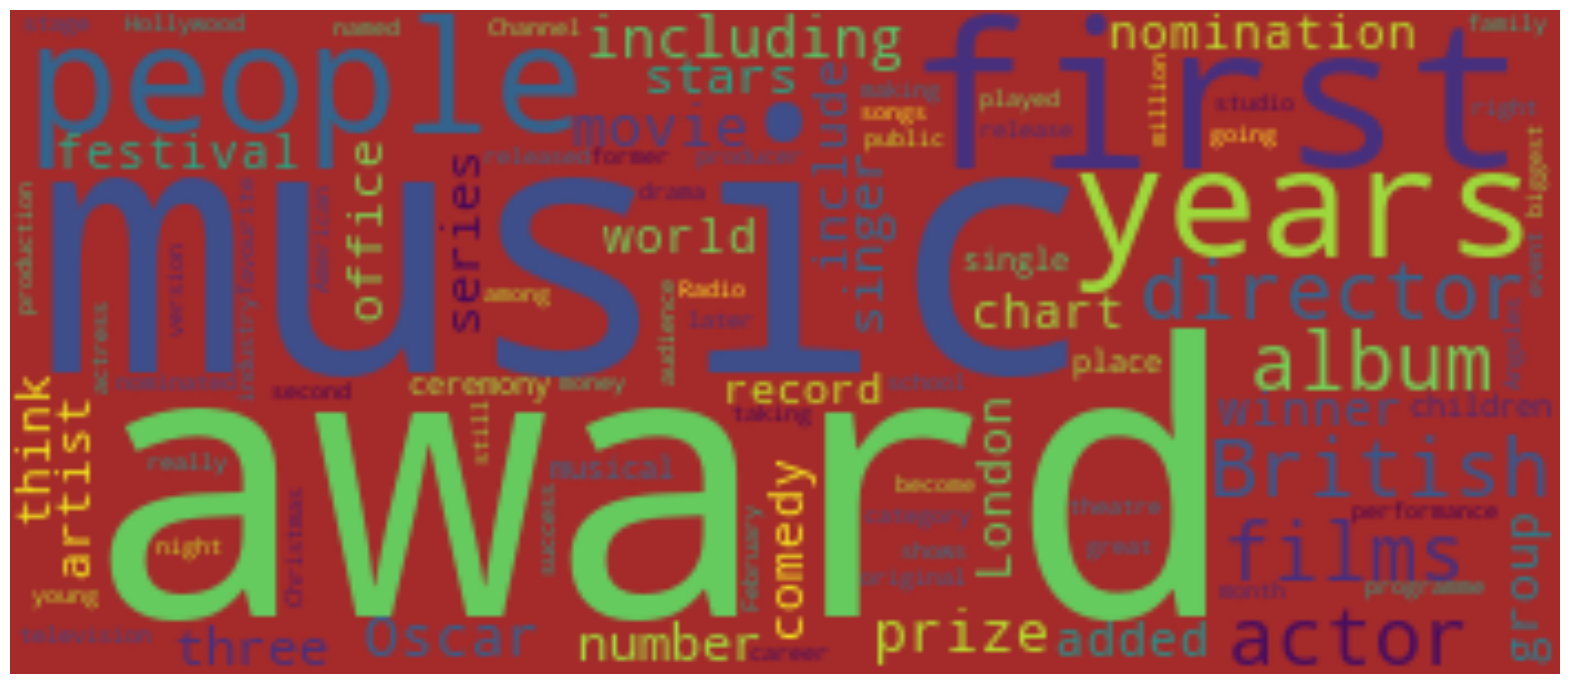

In [75]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='brown').generate(" ".join(data[data.label=='entertainment'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for politics text docs

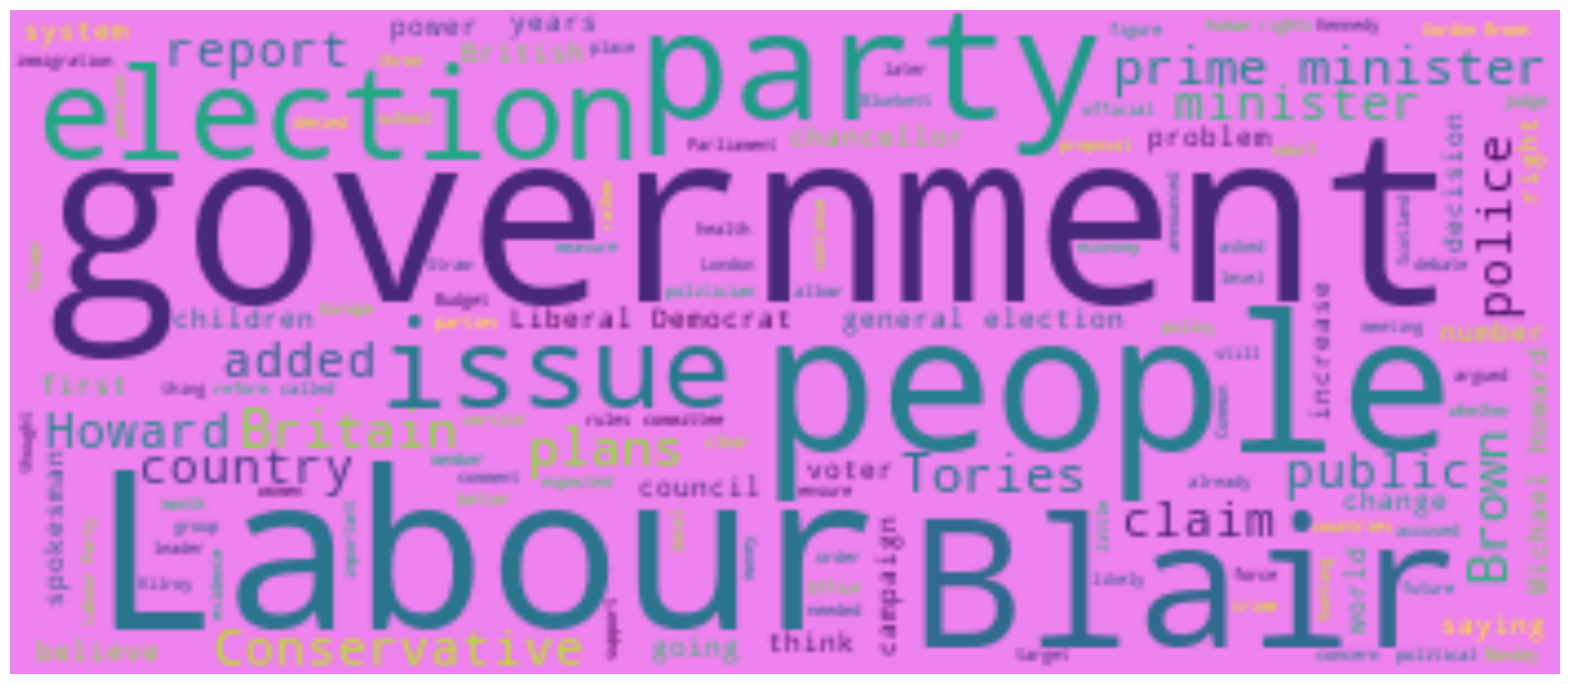

In [78]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='violet').generate(" ".join(data[data.label=='politics'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for sport text docs

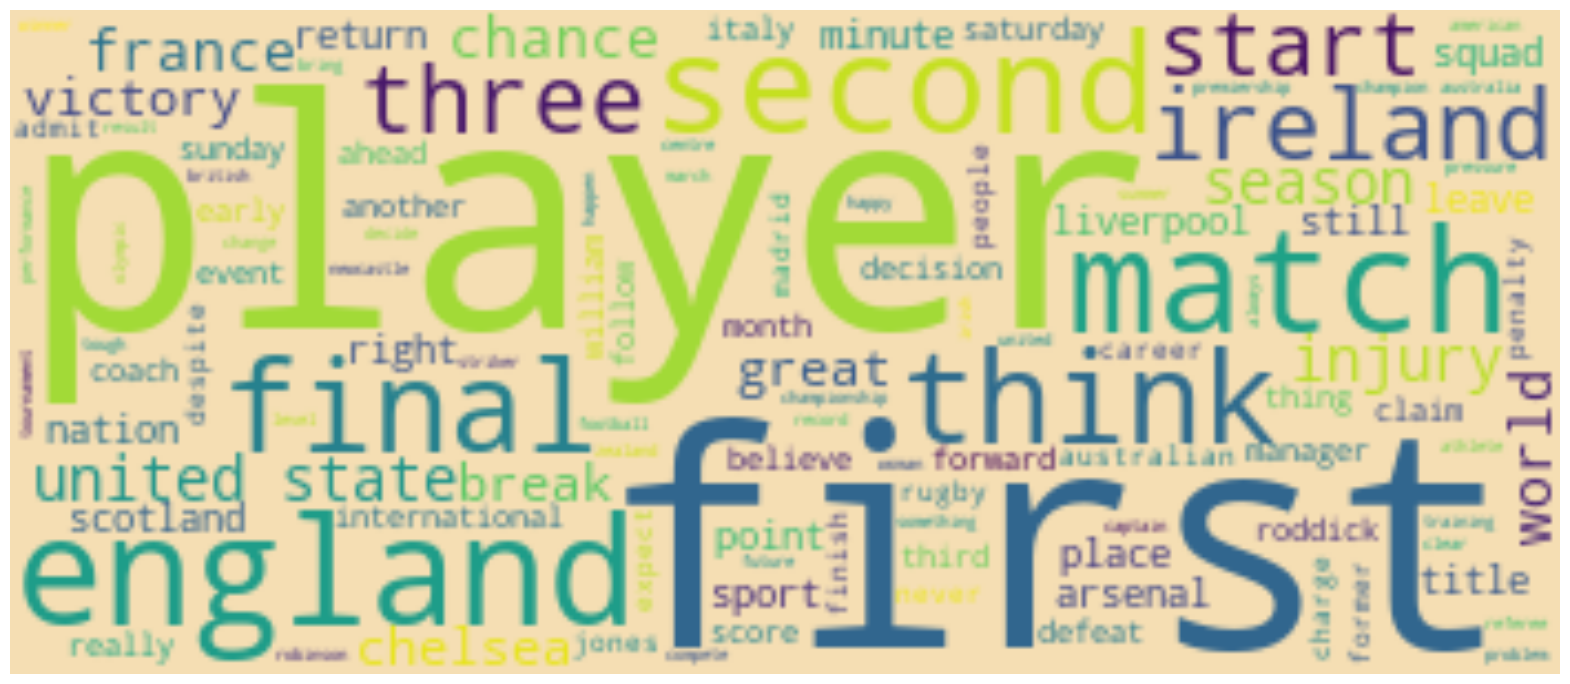

In [129]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='wheat').generate(" ".join(data[data.label=='sport'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for tech docs

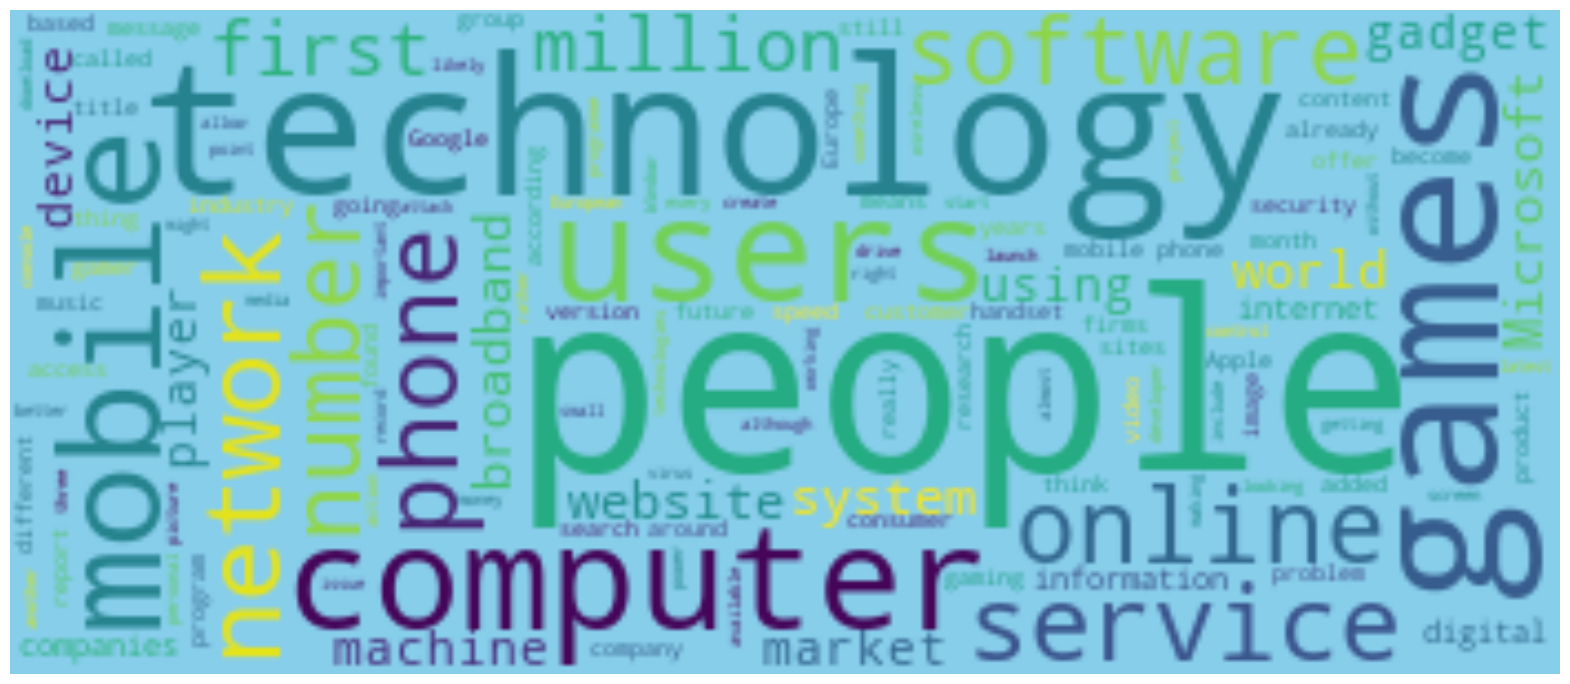

In [80]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='skyblue').generate(" ".join(data[data.label=='tech'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

### **Data Cleaning**

#### new line "\n" from the text

In [19]:
def cleaner_text(text):
  #removing the html tags
  text=re.sub(r"\n"," ",text)
  return text

In [20]:
data['text']=data['text'].apply(cleaner_text)

### Removing the HTML Tags from the text

In [21]:
def html_cleaner(text):
  #removing the html tags
  text=re.sub(r"<.*?>"," ",text)
  return text

In [22]:
data['text']=data['text'].apply(html_cleaner)

#### Removing Punctuation marks

In [23]:
def remove_marks(text):
  text=re.sub(r"[!\"#$%&\\'()*+,-\.\/:;<=>\?\]\^_\`{\|}\]\0-9]+"," ",text)
  return text

In [24]:
data['text']=data['text'].apply(remove_marks)

In [25]:
data.head()

text     label
0  Ad sales boost Time Warner profit Quarterly pr...  business
1  Dollar gains on Greenspan speech The dollar ha...  business
2  Yukos unit buyer faces loan claim The owners o...  business
3  High fuel prices hit BA s profits British Airw...  business
4  Pernod takeover talk lifts Domecq Shares in UK...  business

#### Removing white spaces and backquotes

In [26]:
def remove_whites(text):
  text=re.sub("(\'s)|([`'])+"," ",text)
  return text

In [27]:
data['text']=data['text'].apply(remove_whites)

#### Chatword Treatment and removing words if length is equal to 1

In [28]:
dd={
    "US":'united states',
    "UK":'united kingdom',
    "BA":'British Airways',
    "D":'had',
    "S":'is',
    "LL":'will',
    "VE":'have',
    "M":'am',
    "U":'you',
    "T":'not',
    "COULDN":'could',
    "SHOULDN":'should',
    "WOULDN":'would',
    "DIDN":'did',
    "DON":'do',
    "DOESN":'does',
    "AREN":'are',
    "WASN":'was',
    "AIN":'is',
    "ISN":'is',
    'TKTS':'tickets',
    'USF':'useful',
    'C':'see',
    'U':'you',
    "M":'am',
    "VE":'have',
    "LL":'will',
    "T":'not',
    "RE":'are',
    '1':'one',
    '2':'two',
    '3':'three',
    '4':'four',
    '5':'five',
    '6':'six',
    '7':'seven',
    '8':'eight',
    '9':'nine',
    '10':'ten',
    'ND':'second',
     "MG":'milligram',
     "XS":"times",
    "X":"times",

}
def chat_treatment(text):
    new_text=[]
    for word in text.split():
        if len(word)>1:
            if word.upper() in dd.keys():
                new_text.append(dd[word.upper()])
            else:
                new_text.append(word)
    return " ".join(new_text)

In [29]:
data['text']=data['text'].apply(chat_treatment)

## **Removing stopwords**

In [30]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stops=stopwords.words('english')

In [32]:
def remove_stop_words(text):
  my_text=[]
  #lower-casing
  text=text.lower()
  tokens=word_tokenize(text)
  for word in tokens:
    if word not in stops:
      my_text.append(word)
  return " ".join(my_text)

In [33]:
data['text']=data['text'].apply(remove_stop_words)

### Performing Lemmatization using Spacy

In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [35]:
def lemmatization_text(text):
  my_text=[]
  doc=nlp(text)
  for token in doc:
    my_text.append(token.lemma_)
  return " ".join(my_text)

In [36]:
data['text']=data['text'].apply(lemmatization_text)

### Word cloud after preprocessing of the dataset

#### Business doc

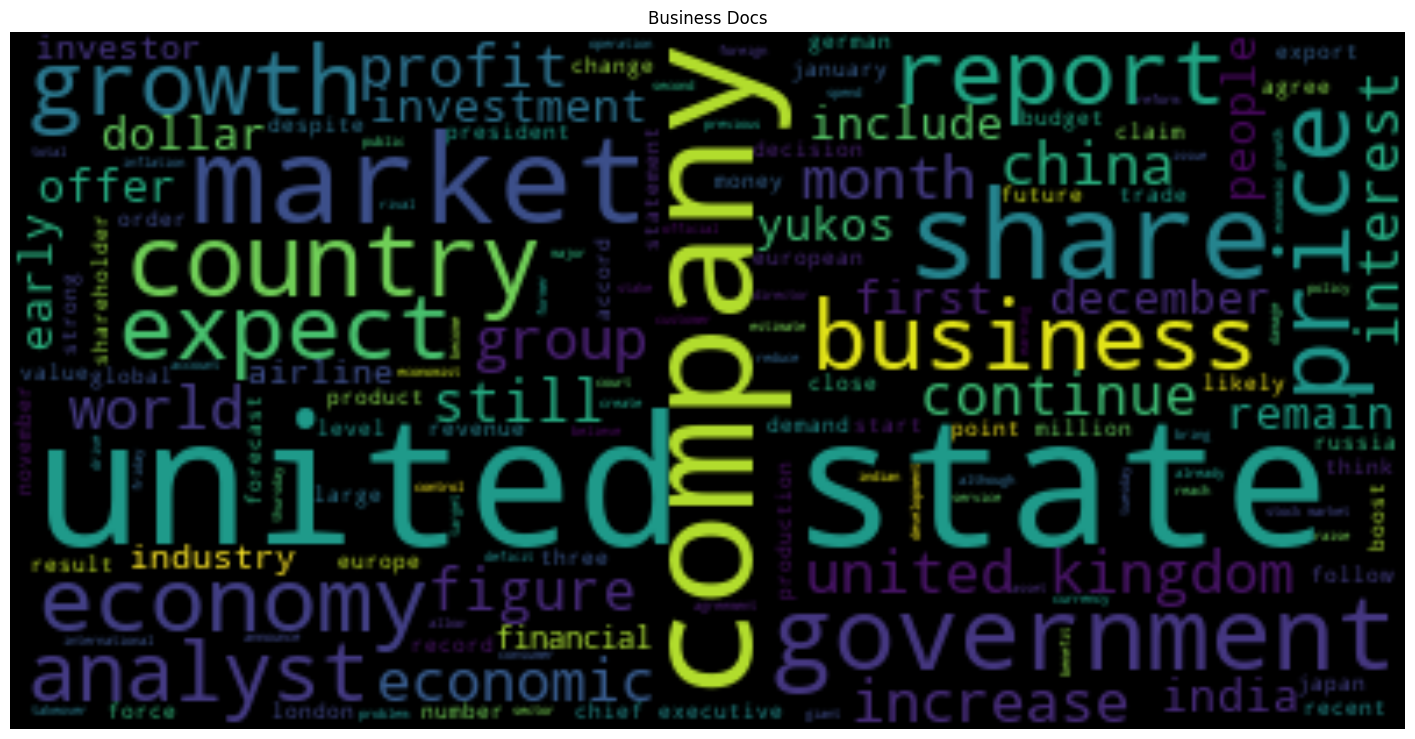

In [131]:
plt.figure(figsize=(18,18))
WordCld=WordCloud(max_words=500,width=400,height=200,min_word_length=5).generate(" ".join(data[data.label=='business'].text))
plt.title('Business Docs')
plt.axis('off')
plt.imshow(WordCld,interpolation='bilinear')
plt.show()

#### Wordcloud for entertainmen doc

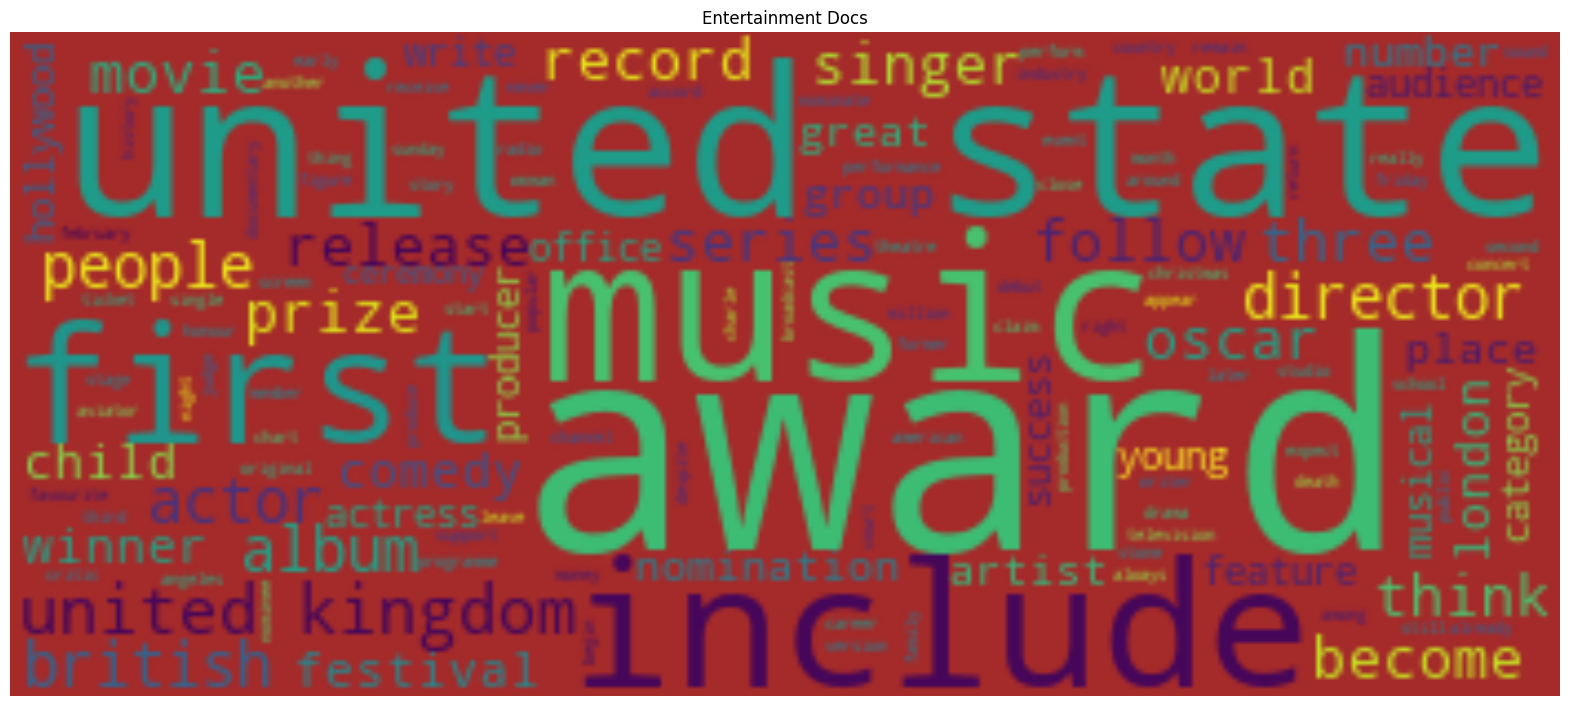

In [132]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='brown').generate(" ".join(data[data.label=='entertainment'].text))
plt.axis('off')
plt.title('Entertainment Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for politics text docs

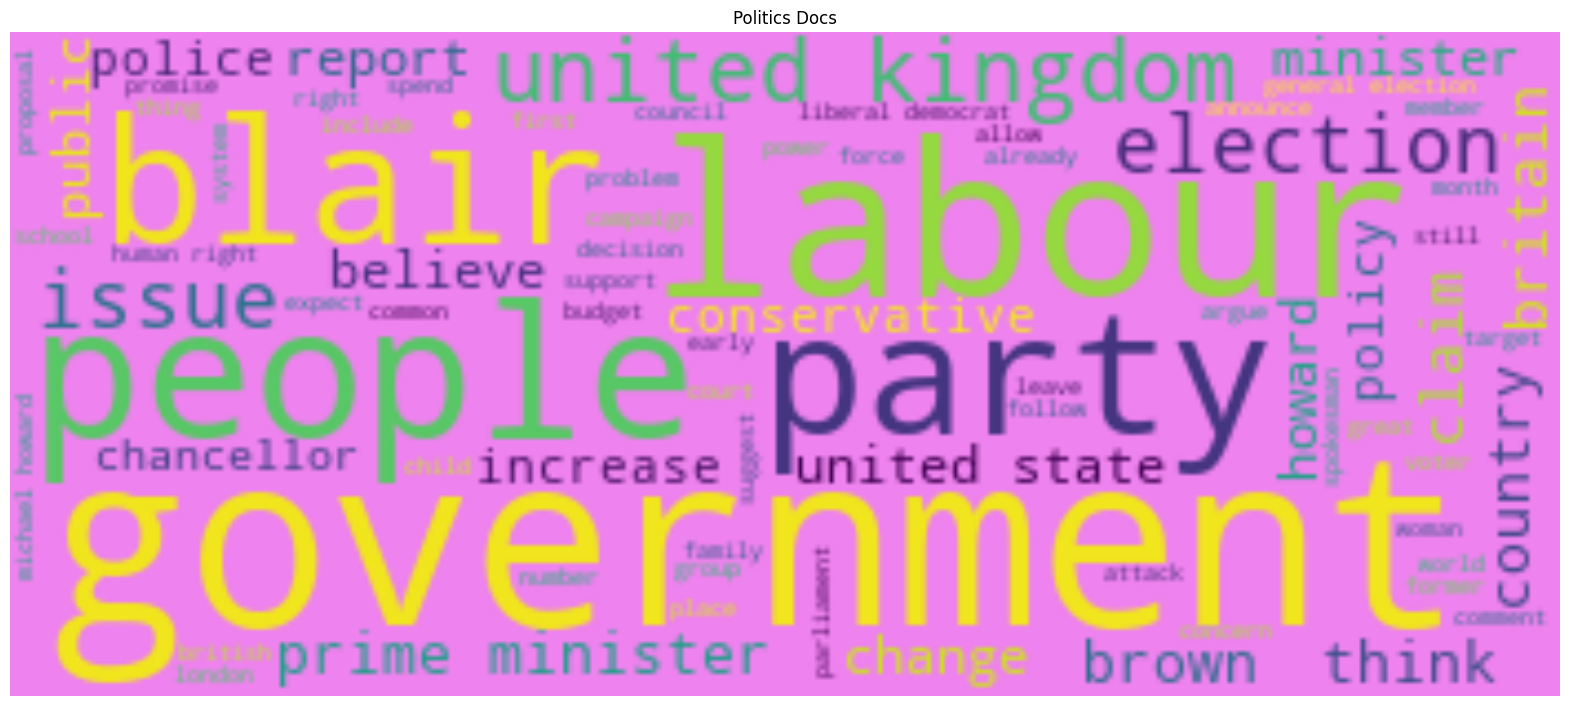

In [133]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='violet').generate(" ".join(data[data.label=='politics'].text))
plt.axis('off')
plt.title('Politics Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for Sport text docs

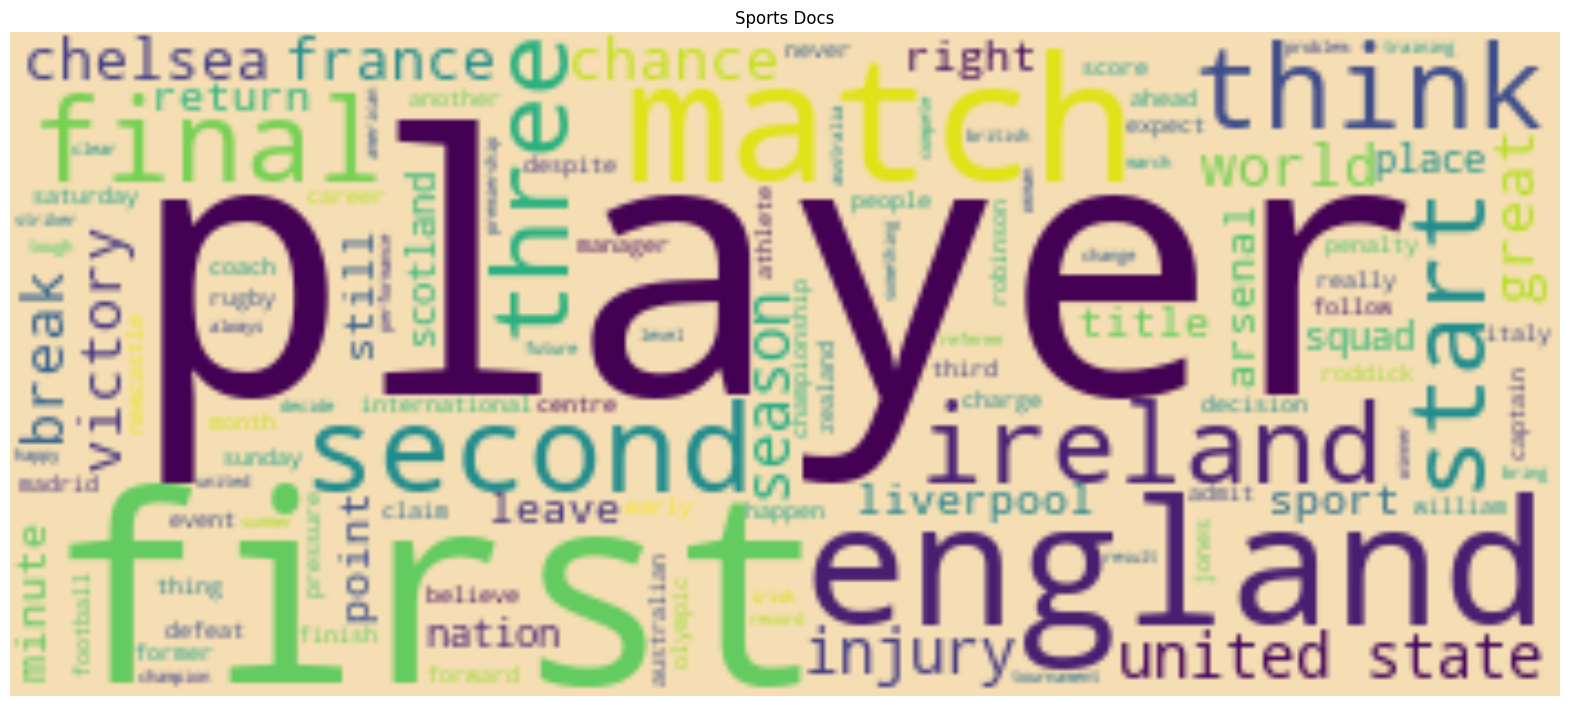

In [134]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='wheat').generate(" ".join(data[data.label=='sport'].text))
plt.axis('off')
plt.title('Sports Docs')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

#### Word cloud for Technology text docs

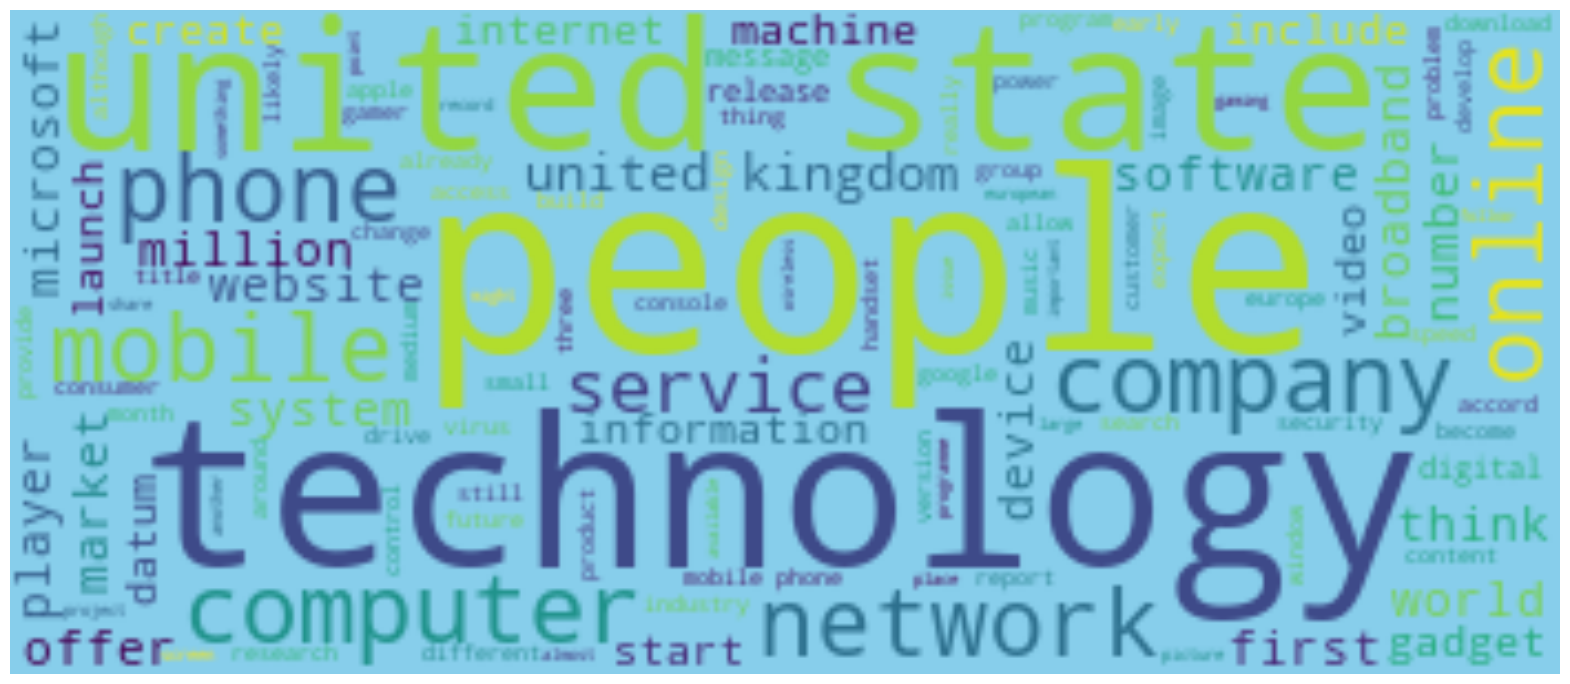

In [135]:
plt.figure(figsize=(20,20))
Wc=WordCloud(max_words=500,width=350,height=150,min_word_length=5,background_color='skyblue').generate(" ".join(data[data.label=='tech'].text))
plt.axis('off')
plt.imshow(Wc,interpolation='bilinear')
plt.show()

## **Splitting the data into train,test and validation**

In [141]:
from sklearn.model_selection import train_test_split

train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'], data['label'],
                                                                    random_state = 42,
                                                                    test_size = 0.2,
                                                                    stratify = data['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state = 42,
                                                                test_size = 0.5,
                                                                stratify = temp_labels)

In [146]:
# pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 799.2 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 1.0 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from transformers import AutoModel, BertTokenizerFast

### Loading the medium sized pretrained model BERT

In [150]:
bert = AutoModel.from_pretrained('bert-base-uncased',num_labels=5)
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ADMIN\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
A parameter name that conta

#### Structure of Bert Model

In [161]:
bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

#### What is the fixed length of the review to keep

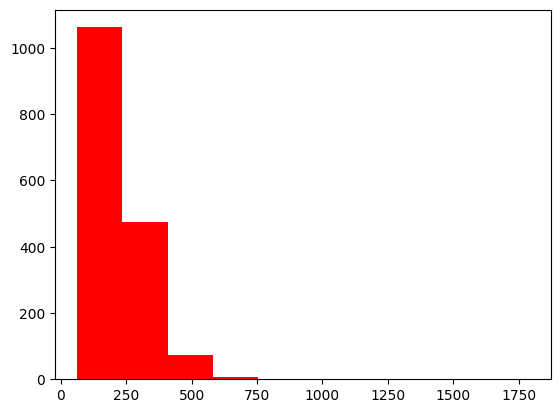

In [162]:
train_lens = [len(str(i).split()) for i in train_text]
plt.hist(train_lens,color='red')
plt.show()

#### Making input size fixed for the Bert Model

In [158]:
pad_len=190

# Convert Series to list of strings, handling potential non-string elements
train_text_list = [str(i) for i in train_text.tolist()]
val_text_list = [str(i) for i in val_text.tolist()]
test_text_list = [str(i) for i in test_text.tolist()]

# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
    train_text_list,  # Use the converted list of strings
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

# Repeat the same process for val_text_list and test_text_list
tokens_val = tokenizer.batch_encode_plus(
    val_text_list,
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

tokens_test = tokenizer.batch_encode_plus(
    test_text_list,
    max_length = pad_len,
    pad_to_max_length = True,
    truncation = True
)

In [163]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

ValueError: too many dimensions 'str'